<a href="https://colab.research.google.com/github/dhikra18/timeseriesproject/blob/main/127177032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trend: [  0.           0.           0.         153.27083333 154.20833333
 155.29166667 156.33333333 157.16666667 158.1875     159.3125
 160.29166667   0.           0.           0.        ]
Seasonality: [-26.16815476 -25.41815476  14.56622024  -1.20982143  -0.45982143
  14.56622024  -1.20982143  -0.45982143  14.56622024  -1.20982143
  -0.45982143  14.56622024  -1.20982143  -0.45982143]


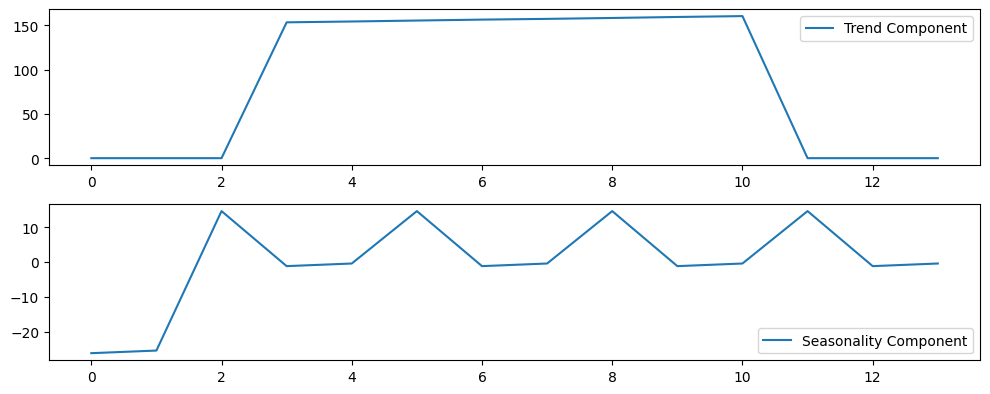

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def moving_average_odd(data, q):

    n = len(data)
    m_t = np.zeros(n)

    values = [item['stock_price'] for item in data]
    for t in range(q, n - q):
        m_t[t] = np.mean(values[t-q:t+q+1])

    return m_t

def moving_average_even(data, q):

    n = len(data)
    m_t = np.zeros(n)
    d = 2*q

    for t in range(q, n - q):
        m_t[t] = (0.5 * data[t-q]['stock_price'] + np.sum([item['stock_price']for item in data[t-q+1:t+q]]) + 0.5 * data[t+q]['stock_price']) / d

    return m_t

def calculate_w_k(data, trend, d):

    n = len(data)
    w_k = np.zeros(n)

    for k in range(n):
        summation = 0
        count = 0
        for j in range(-(n // d), n // d):
            if 0 <= k + j*d < n:
                summation += data[k + j*d]['stock_price'] - trend[k + j*d]
                count += 1
        if count > 0:
            w_k[k] = summation / count

    return w_k

def calculate_g_k(w_k, d): #seasonality

    n = len(w_k)
    avg_w = np.mean(w_k)
    g_k = np.zeros(n)

    for k in range(n):
        g_k[k] = w_k[k] - avg_w

    return g_k

data = np.array([
    {"date": "2023-09-01", "stock_price": 150.25},
    {"date": "2023-09-02", "stock_price": 152.00},
    {"date": "2023-09-03", "stock_price": 151.50},
    {"date": "2023-09-04", "stock_price": 153.75},
    {"date": "2023-09-05", "stock_price": 155.00},
    {"date": "2023-09-06", "stock_price": 154.25},
    {"date": "2023-09-07", "stock_price": 156.00},
    {"date": "2023-09-08", "stock_price": 157.50},
    {"date": "2023-09-09", "stock_price": 159.00},
    {"date": "2023-09-10", "stock_price": 158.75},
    {"date": "2023-09-11", "stock_price": 160.00},
    {"date": "2023-09-12", "stock_price": 161.50},
    {"date": "2023-09-13", "stock_price": 162.25},
    {"date": "2023-09-14", "stock_price": 163.00}
])


q = 3

if len(data) % 2 == 1:
    trend = moving_average_odd(data, q)
else:
    trend = moving_average_even(data, q)

w_k = calculate_w_k(data, trend, q)
g_k = calculate_g_k(w_k, q)

print("Trend:", trend)
print("Seasonality:", g_k)


plt.figure(figsize=(10, 6))


plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(g_k, label='Seasonality Component')
plt.legend()

plt.tight_layout()
plt.show()